In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6


In [2]:
dataset = pd.read_csv('C:/Users/sachin.ichake/Downloads/AirPassengers.csv',infer_datetime_format=True)
indexedDataset = dataset.set_index('Month')
indexedDataset.head(5)


,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


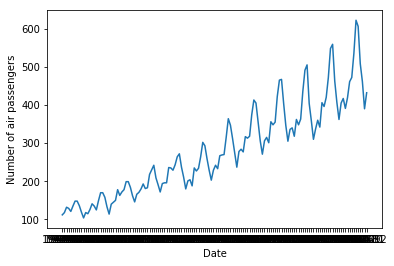

In [3]:
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.plot(indexedDataset)

In [4]:
#Determine the rolling statistics
rolmean = indexedDataset.rolling(window=12).mean()
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

         #Passengers
Month               
1949-01          NaN
1949-02          NaN
1949-03          NaN
1949-04          NaN
1949-05          NaN
1949-06          NaN
1949-07          NaN
1949-08          NaN
1949-09          NaN
1949-10          NaN
1949-11          NaN
1949-12   126.666667
1950-01   126.916667
1950-02   127.583333
1950-03   128.333333
1950-04   128.833333
1950-05   129.166667
1950-06   130.333333
1950-07   132.166667
1950-08   134.000000
1950-09   135.833333
1950-10   137.000000
1950-11   137.833333
1950-12   139.666667
1951-01   142.166667
1951-02   144.166667
1951-03   147.250000
1951-04   149.583333
1951-05   153.500000
1951-06   155.916667
...              ...
1958-07   376.333333
1958-08   379.500000
1958-09   379.500000
1958-10   380.500000
1958-11   380.916667
1958-12   381.000000
1959-01   382.666667
1959-02   384.666667
1959-03   388.333333
1959-04   392.333333
1959-05   397.083333
1959-06   400.166667
1959-07   404.916667
1959-08   409.416667
1959-09   414

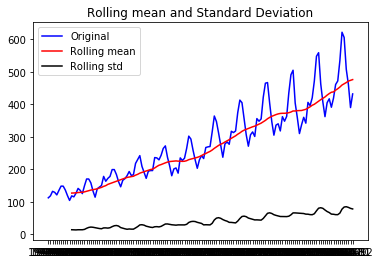

In [5]:
#Plot rolling stats
orig = plt.plot(indexedDataset,color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label ='Rolling mean')
std = plt.plot(rolstd,color = 'black', label ='Rolling std')
plt.legend(loc = 'best')
plt.title('Rolling mean and Standard Deviation')
plt.show()


In [6]:
# perform dickey-fuller test
from statsmodels.tsa.stattools import adfuller
print ('Result for Dickey fuller test')
# print(indexedDataset['#Passengers'])
dftest= adfuller(indexedDataset['#Passengers'],autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of observation Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
    
print(dfoutput)
    

Result for Dickey fuller test
Test Statistic                  0.815369
p-value                         0.991880
#Lags Used                     13.000000
Number of observation Used    130.000000
Critical Value (5%)            -2.884042
Critical Value (1%)            -3.481682
Critical Value (10%)           -2.578770
dtype: float64


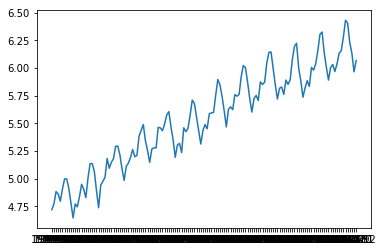

In [22]:
#Estimate trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

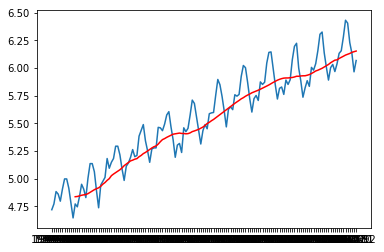

In [8]:
#MA
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingStd = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage,color='red')

In [9]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,#Passengers
Month,
1949-12,-0.065494
1950-01,-0.093449
1950-02,-0.007566
1950-03,0.099416
1950-04,0.052142
1950-05,-0.027529
1950-06,0.139881
1950-07,0.260184
1950-08,0.248635


In [10]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    movingAverage = timeseries.rolling(window=12).mean()
    movingStd = timeseries.rolling(window=12).std()
    
    # Plot rolling
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(movingAverage, color='red',label='Rolling Average')
    std = plt.plot(movingStd, color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # perform Dickey Fuller Test
    print('Result of Dickey Fuller Test')
    dftest = adfuller(timeseries['#Passengers'],autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of observation Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value    
    print(dfoutput)

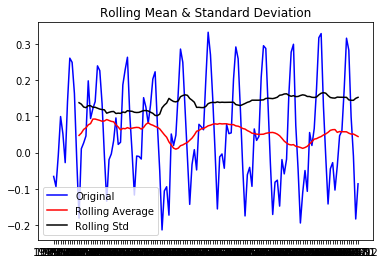

Result of Dickey Fuller Test
Test Statistic                 -3.162908
p-value                         0.022235
#Lags Used                     13.000000
Number of observation Used    119.000000
Critical Value (5%)            -2.886151
Critical Value (1%)            -3.486535
Critical Value (10%)           -2.579896
dtype: float64


In [11]:
test_stationary(datasetLogScaleMinusMovingAverage)

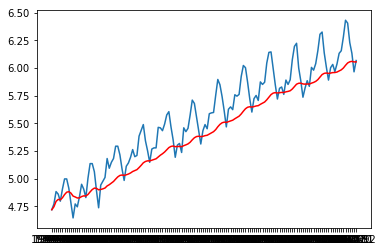

In [12]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage,color='red')

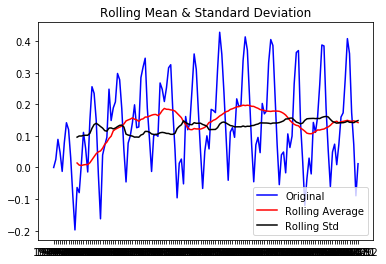

Result of Dickey Fuller Test
Test Statistic                 -3.601262
p-value                         0.005737
#Lags Used                     13.000000
Number of observation Used    130.000000
Critical Value (5%)            -2.884042
Critical Value (1%)            -3.481682
Critical Value (10%)           -2.578770
dtype: float64


In [13]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationary(datasetLogScaleMinusMovingExponentialDecayAverage)

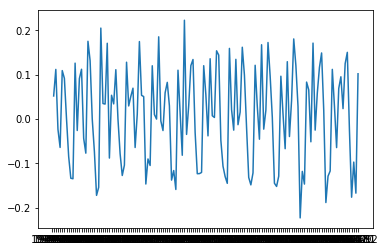

In [14]:
datasetLogDiffShifting  = indexedDataset_logScale-indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

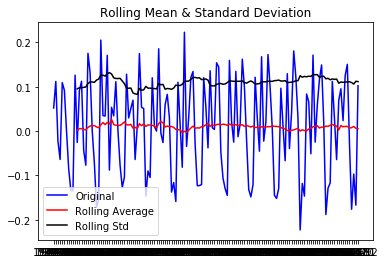

Result of Dickey Fuller Test
Test Statistic                 -2.717131
p-value                         0.071121
#Lags Used                     14.000000
Number of observation Used    128.000000
Critical Value (5%)            -2.884398
Critical Value (1%)            -3.482501
Critical Value (10%)           -2.578960
dtype: float64


In [15]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationary(datasetLogDiffShifting)

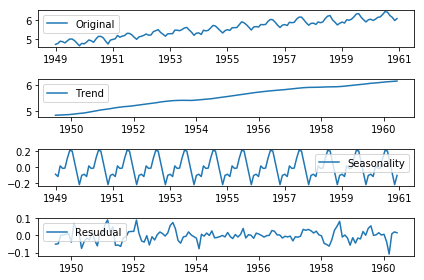

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

# print(indexedDataset_logScale)
indexedDataset_logScale.reset_index(inplace=True)
indexedDataset_logScale['Month'] = pd.to_datetime(indexedDataset_logScale['Month'])
indexedDataset_logScale = indexedDataset_logScale.set_index('Month')
# s=sm.tsa.seasonal_decompose(df.divida)

decomposition = seasonal_decompose(indexedDataset_logScale)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Resudual')
plt.legend(loc='best')
plt.tight_layout()




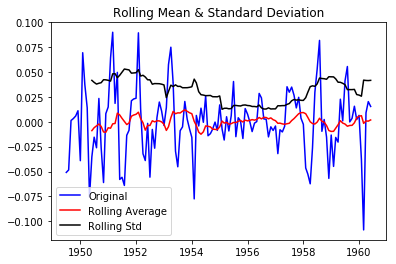

Result of Dickey Fuller Test
Test Statistic               -6.332387e+00
p-value                       2.885059e-08
#Lags Used                    9.000000e+00
Number of observation Used    1.220000e+02
Critical Value (5%)          -2.885538e+00
Critical Value (1%)          -3.485122e+00
Critical Value (10%)         -2.579569e+00
dtype: float64


In [18]:
decomposedLogData =residual
decomposedLogData.dropna(inplace=True)
test_stationary(decomposedLogData)

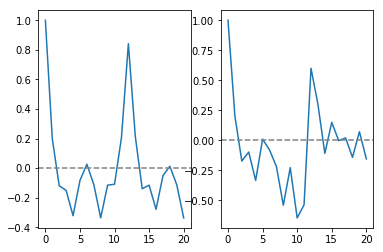

In [19]:
from statsmodels.tsa.stattools import acf , pacf
lag_acf = acf(datasetLogDiffShifting,nlags=20)
lag_pacf = pacf(datasetLogDiffShifting,nlags=20,method='ols')

#plot acf
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')


#plot acf
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')

c:\python35\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\python35\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR Model


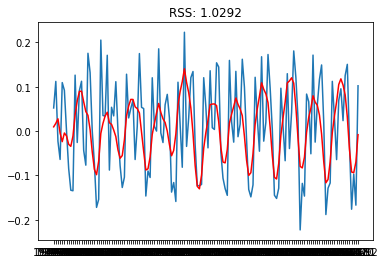

In [26]:
from statsmodels.tsa.arima_model import ARIMA
#AR Model

model = ARIMA(indexedDataset_logScale,order=(2, 1, 2))

# print(model)
result_AR= model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(result_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((result_AR.fittedvalues-datasetLogDiffShifting["#Passengers"])**2))
print('Plotting AR Model')


c:\python35\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\python35\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR Model


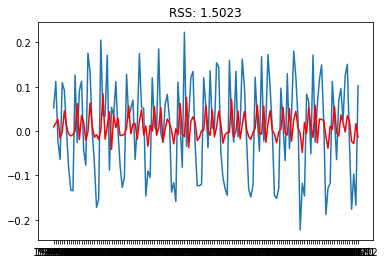

In [27]:
from statsmodels.tsa.arima_model import ARIMA
#MA Model

model = ARIMA(indexedDataset_logScale,order=(2, 1, 0))

# print(model)
result_MA= model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(result_MA.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((result_MA.fittedvalues-datasetLogDiffShifting["#Passengers"])**2))
print('Plotting AR Model')

c:\python35\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\python35\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR Model


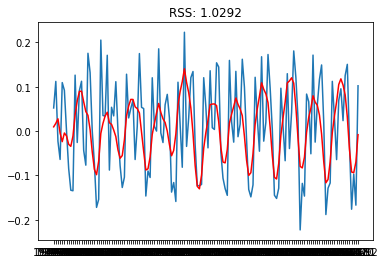

In [28]:
from statsmodels.tsa.arima_model import ARIMA
#MA Model

model = ARIMA(indexedDataset_logScale,order=(2, 1, 2))

# print(model)
result_ARIMA= model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(result_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((result_ARIMA.fittedvalues-datasetLogDiffShifting["#Passengers"])**2))
print('Plotting AR Model')

In [29]:
prediction_ARIMA_diff = pd.Series(result_ARIMA.fittedvalues,copy=True)
print(prediction_ARIMA_diff.head())

Month
1949-02    0.009580
1949-03    0.017491
1949-04    0.027670
1949-05   -0.004521
1949-06   -0.023889
dtype: float64


In [32]:
prediction_ARIMA_diff_cumsum = prediction_ARIMA_diff.cumsum()
print(prediction_ARIMA_diff_cumsum.head())

Month
1949-02    0.009580
1949-03    0.027071
1949-04    0.054742
1949-05    0.050221
1949-06    0.026331
dtype: float64


In [34]:
prediction_ARIMA_log = pd.Series(indexedDataset_logScale['#Passengers'].ix[0], index=indexedDataset_logScale.index)
prediction_ARIMA_log = prediction_ARIMA_log.add(prediction_ARIMA_diff_cumsum,fill_value =0)
prediction_ARIMA_log.head()

c:\python35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
1949-01    4.718499
1949-02    4.728079
1949-03    4.745570
1949-04    4.773241
1949-05    4.768720
dtype: float64

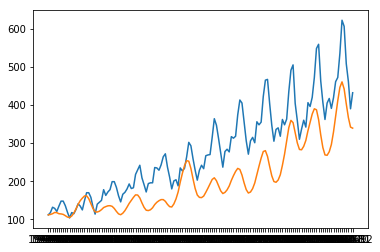

In [35]:
prediction_ARIMA = np.exp(prediction_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(prediction_ARIMA)

In [37]:
indexedDataset_logScale

,#Passengers
Month,
1949-01,4.718499
1949-02,4.770685
1949-03,4.882802
1949-04,4.859812
1949-05,4.795791
1949-06,4.905275
1949-07,4.997212
1949-08,4.997212
1949-09,4.912655


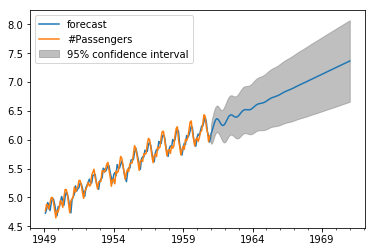

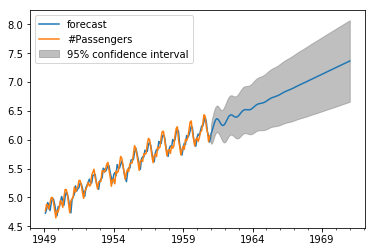

In [38]:
result_ARIMA.plot_predict(1,264)
